In [5]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


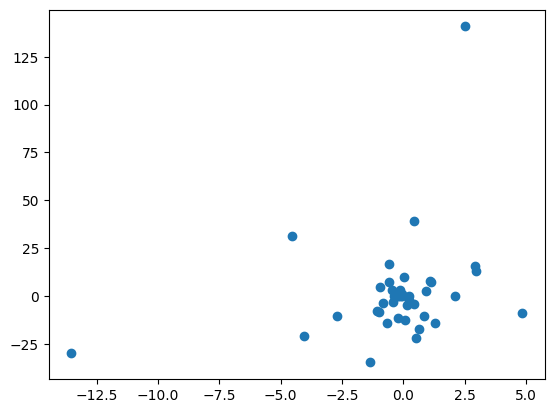

In [9]:
# Plot your data to see what's in your DataFrame
plt.scatter(df_market_data["price_change_percentage_24h"],df_market_data["price_change_percentage_30d"])


---

### Prepare the Data

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
st_sc_df = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h",
                                                          "price_change_percentage_7d",
                                                          "price_change_percentage_14d",
                                                          "price_change_percentage_30d",
                                                          "price_change_percentage_60d",
                                                          "price_change_percentage_200d",
                                                          "price_change_percentage_1y"]])

st_sc_df[:5]


array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [14]:
# Create a DataFrame with the scaled data
Standardized_df = pd.DataFrame(st_sc_df, columns = ["price_change_percentage_24h",
                                                          "price_change_percentage_7d",
                                                          "price_change_percentage_14d",
                                                          "price_change_percentage_30d",
                                                          "price_change_percentage_60d",
                                                          "price_change_percentage_200d",
                                                          "price_change_percentage_1y"])


# Copy the crypto names from the original data
Standardized_df["coin_id"] = df_market_data.index

# Set the coinid column as index
Standardized_df.set_index("coin_id", inplace = True)

# Display sample data
Standardized_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [25]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []


In [26]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  model = KMeans(n_clusters = i)
  model.fit(Standardized_df)
  inertia.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [27]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
inertia_df = pd.DataFrame({
    "k":k,
    "inertia" : inertia
})


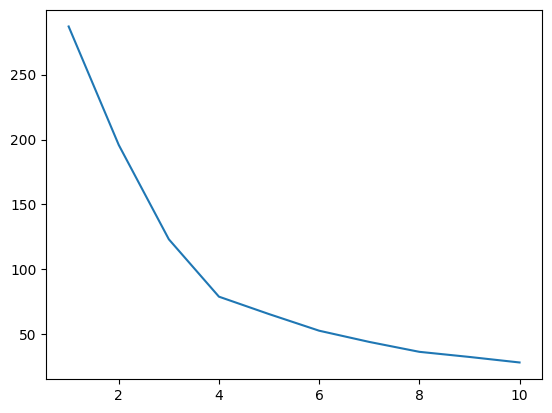

In [28]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(inertia_df["k"],inertia_df["inertia"])
plt.show()


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 3-4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [48]:
# Initialize the K-Means model using the best value for k
Kmodel = KMeans(n_clusters = 3)

# Fit the K-Means model using the scaled data
Kmodel.fit(Standardized_df)

# Predict the clusters to group the cryptocurrencies using the scaled data
K3 = Kmodel.predict(Standardized_df)

# Print the resulting array of cluster values.
K3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [49]:
# Create a copy of the DataFrame
copy_df = Standardized_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_df["k3"] = K3

# Display sample data
copy_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k3
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


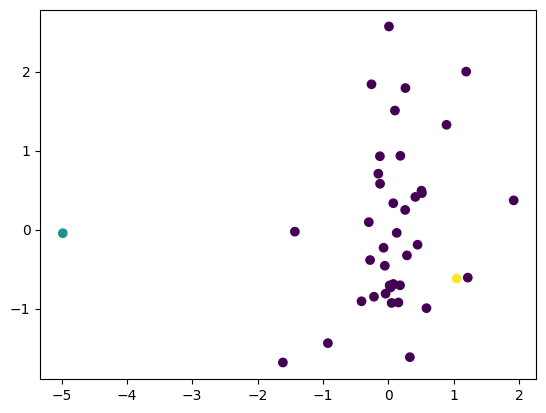

In [50]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.scatter(copy_df["price_change_percentage_24h"],copy_df["price_change_percentage_7d"] , c = copy_df["k3"])
plt.show()


---

### Optimize Clusters with Principal Component Analysis.

In [38]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components = 3)

# Use the PCA model with `fit_transform` to reduce to
# three principal components.
pcamodel_df = pca.fit_transform(copy_df)

# View the first five rows of the DataFrame.
pcamodel_df[:5]


array([[-0.45873702,  0.92907456,  0.46276177],
       [-0.38683294,  0.52508871,  0.95297029],
       [-0.45775058, -0.09097355, -0.64436307],
       [-0.5045067 , -0.13766044, -0.48274733],
       [-0.80801439,  2.20236181,  1.86174764]])

In [39]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.37701473, 0.34354479, 0.17333394])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89389346

In [40]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pcamodel_df, columns = ["PC1", "PC2" , "PC3"])

# Copy the crypto names from the original data
pca_df["Coin_id"] = Standardized_df.index

# Set the coinid column as index
pca_df.set_index("Coin_id", inplace = True)

# Display sample data
pca_df.head()


,PC1,PC2,PC3
Coin_id,,,
bitcoin,-0.458737,0.929075,0.462762
ethereum,-0.386833,0.525089,0.952970
tether,-0.457751,-0.090974,-0.644363
ripple,-0.504507,-0.137660,-0.482747
bitcoin-cash,-0.808014,2.202362,1.861748


---

### Find the Best Value for k Using the PCA Data

In [41]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

# Create an empty list to store the inertia values
inertia = []


In [42]:
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:

  model = KMeans(n_clusters = i)
  model.fit(pca_df)
  inertia.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [43]:
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
pca_k3_df = pd.DataFrame({
    "k" : k,
    "inertia" : inertia
})


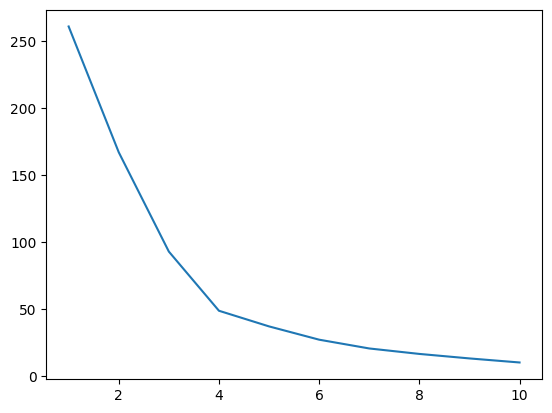

In [44]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.plot(pca_k3_df["k"],pca_k3_df["inertia"])
plt.show()


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [61]:
# Initialize the K-Means model using the best value for k
# Fit the K-Means model using the PCA data
# Predict the clusters to group the cryptocurrencies using the PCA data
# Print the resulting array of cluster values.
kmodel = KMeans(n_clusters = 3)
kmodel.fit(pca_df)
k3 = kmodel.predict(pca_df)
k3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [62]:
# Create a copy of the DataFrame with the PCA data
copy_pca_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_pca_df["k3"] = k3

# Display sample data
copy_pca_df.head()


,PC1,PC2,PC3,k3
Coin_id,,,,
bitcoin,-0.458737,0.929075,0.462762,0
ethereum,-0.386833,0.525089,0.952970,0
tether,-0.457751,-0.090974,-0.644363,0
ripple,-0.504507,-0.137660,-0.482747,0
bitcoin-cash,-0.808014,2.202362,1.861748,0


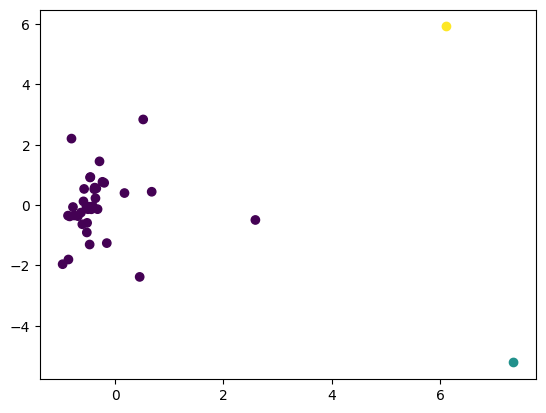

In [63]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.scatter(copy_pca_df["PC1"] , copy_pca_df["PC2"] , c = copy_pca_df["k3"])

plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [ ]:
# Composite plot to contrast the Elbow curves

In [ ]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**